<H2><CENTER> Sentiment Analysis<CENTER><H2>

### Importing necessary packages

In [6]:
import re
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from cltk.stop.classical_hindi.stops import STOPS_LIST
from spacy.lang.te import STOP_WORDS as STOP_WORDS_HI

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 


In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

### Reading files

In [4]:
import codecs
with codecs.open("C:\\Users\haris\\Downloads\\Twitter corpus of Resource-Scarce Languages for Sentiment Analysis and Multilingual Emoji Prediction\\data\\data\\emoji_prediction_data\\hindi_data\\hindi.txt", encoding='utf-8') as f:
    txt = f.read()#to read the total file
print(txt[0:1000])

कुछ भी हो जाये आज का मैच हारू या जीतू भाई लेकिन पाण्डेय ने साबित कर दिया की हम जनरल वाले गिरते लडखडाते मंजिल तक पहुच ही जाते हैं!liveअपडेट
नसा चडाउने रुप तिम्रो मायाले हेर्दा फेरिन्छ की आशा बढाउने साथ तिम्रो आशैआशले घेरिन्छ की
अब सुबह की वो एक्स्ट्रा दो घण्टे की नींद अरमान बन कर रह गयी है। शायद मेच्योरिटी/ जिम्मेदारी सबसे पहले नींद पर असर डालती है
Abp न्यूज़ वाले तो ऐसे हनीप्रीत के पीछे लगे हुए हैं, जैसे की उनके ex gf वापिस आ गयी हो।
सोचेंगे हमकि क्यूँ दिल को भातेहो बोलेंगे कि क्यूँ इतना दिल को लुभातेहो कहदो आज तुमभी अपने दिल से नही है प्यार फिर इंतजार क्यूँ करतेहो #moon
आज की #FunKiBaat में बहुत ही मज़ा आया (बउआ भाई), सुषमा जी के और हाफिज के बातो का मेल खूब पसंद आया।। लगे रहो और ऐसे ही हँसाते रहो
सारे शहर में उनकी कामयाबी के चर्चे हैं और एक हम हैं उनके इतने अज़ीज़ कि हमको उनकी खबर तक नही #moon
राहुल गांधी, जब सत्ता में नहीं मंदिरों का दौरा कर रहे हैं, जब सत्ता में थे कोर्ट में कहा कि "राम कभी था ही नहीं" गुजरात वालो समझ जाओ!
भारत सरकार की पडोसी देश अफगानिस्तान की मदद करना बहुत ही अच्छ

In [5]:
sentiment=(pd.read_csv("C:\\Users\haris\\Downloads\\Twitter corpus of Resource-Scarce Languages for Sentiment Analysis and Multilingual Emoji Prediction\\data\\data\\emoji_prediction_data\\hindi_data\\hindi.csv"))
sentiment= sentiment["label"].tolist() 

### Cleaning Text

In [9]:
def remove_punct(text):
    new_words = " "
    for word in text:
        w = re.sub(r'[.#-:?!\_|""'',-...A-Za-z0-9]','',word) #remove everything except words and space#how 
        new_words = new_words + w
    return re.sub(r"\s+", " ", new_words, flags=re.UNICODE)

In [10]:
text=txt.splitlines()
#print(remove_punct(text_cleaned[0:10000]))
filtered_sentence = []
for i in range(0,len(text)):
    if i not in STOP_WORDS_HI:
        filtered_sentence.append(remove_punct(text[i]))
print(filtered_sentence[0:10])

[' कुछ भी हो जाये आज का मैच हारू या जीतू भाई लेकिन पाण्डेय ने साबित कर दिया की हम जनरल वाले गिरते लडखडाते मंजिल तक पहुच ही जाते हैंअपडेट', ' नसा चडाउने रुप तिम्रो मायाले हेर्दा फेरिन्छ की आशा बढाउने साथ तिम्रो आशैआशले घेरिन्छ की', ' अब सुबह की वो एक्स्ट्रा दो घण्टे की नींद अरमान बन कर रह गयी है। शायद मेच्योरिटी जिम्मेदारी सबसे पहले नींद पर असर डालती है', ' न्यूज़ वाले तो ऐसे हनीप्रीत के पीछे लगे हुए हैं जैसे की उनके वापिस आ गयी हो।', ' सोचेंगे हमकि क्यूँ दिल को भातेहो बोलेंगे कि क्यूँ इतना दिल को लुभातेहो कहदो आज तुमभी अपने दिल से नही है प्यार फिर इंतजार क्यूँ करतेहो ', ' आज की में बहुत ही मज़ा आया बउआ भाई सुषमा जी के और हाफिज के बातो का मेल खूब पसंद आया।। लगे रहो और ऐसे ही हँसाते रहो', ' सारे शहर में उनकी कामयाबी के चर्चे हैं और एक हम हैं उनके इतने अज़ीज़ कि हमको उनकी खबर तक नही ', ' राहुल गांधी जब सत्ता में नहीं मंदिरों का दौरा कर रहे हैं जब सत्ता में थे कोर्ट में कहा कि राम कभी था ही नहीं गुजरात वालो समझ जाओ', ' भारत सरकार की पडोसी देश अफगानिस्तान की मदद करना बहुत ही अच्छा कदम इससे 

### text to vector

In [11]:
tokens = Tokenizer(num_words = np.inf,oov_token = "<OOV>")
tokens.fit_on_texts(filtered_sentence)
word_index = tokens.word_index

In [12]:
sequences = tokens.texts_to_sequences(filtered_sentence)
pad = pad_sequences(sequences,padding = 'post')

In [13]:
le = LabelEncoder()
Y = le.fit_transform(sentiment[0:len(filtered_sentence)])
la=le.inverse_transform(Y)
set(la)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19}

### Splitting data

In [14]:
#Splitting the data into train data and test data
X_train, X_test, y_train, y_test = train_test_split(pad,Y, test_size = 0.15, random_state = 42)

In [15]:
#Printing the size of the train data, train label, test data and test label
print("Shape train data = ",np.shape(X_train))
print("Shape of train label = ",np.shape(y_train))
print("Shape of test data = ",np.shape(X_test))
print("Shape of test label = ",np.shape(y_test))

Shape train data =  (172052, 60)
Shape of train label =  (172052,)
Shape of test data =  (30363, 60)
Shape of test label =  (30363,)


### Classification Algorithm

#### Decision Tree Classifier

In [16]:
clf1 = DecisionTreeClassifier()
clf1 = clf1.fit(X_train, y_train)

In [17]:
y_pred = clf1.predict(X_test)

#### Decision Tree Classifier Report

In [18]:
#Computation of the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy = ','%.2f'%(accuracy*100))

Accuracy =  54.83


In [19]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, output_dict=True)
report1 = classification_report(y_test, y_pred)

macro_precision1 =  report['macro avg']['precision'] 
macro_recall1 = report['macro avg']['recall']    
macro_f11 = report['macro avg']['f1-score']
accuracy1 = report['accuracy']

print(report1)

              precision    recall  f1-score   support

           0       0.51      0.52      0.51      2051
           1       0.57      0.58      0.58      2255
           2       0.52      0.54      0.53      2810
           3       0.54      0.55      0.55      2019
           4       0.59      0.61      0.60      1159
           5       0.55      0.53      0.54      2911
           6       0.59      0.57      0.58      2936
           7       0.50      0.54      0.52      1280
           8       0.47      0.49      0.48       842
           9       0.52      0.50      0.51      1522
          10       0.60      0.70      0.65       533
          11       0.60      0.65      0.62       723
          12       0.50      0.47      0.48       842
          13       0.54      0.52      0.53      2207
          14       0.58      0.58      0.58       873
          15       0.58      0.55      0.56      2501
          16       0.60      0.60      0.60       460
          17       0.56    

In [20]:
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

[2091, 2314, 2879, 2062, 1187, 2784, 2865, 1363, 868, 1466, 620, 775, 802, 2123, 873, 2364, 457, 102, 2368]


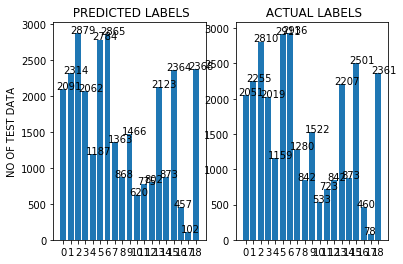

In [21]:
ax=plt.subplot(1,2,1)
x=np.arange(19)
height=[]
for i in range(0,19):
    height.append(len(y_pred[y_pred==i]))
print(height)
plt.bar(x, height=height)
plt.xticks(x, x)
plt.title(" PREDICTED LABELS")
plt.ylabel("NO OF TEST DATA")
for index, value in enumerate(x):
    
    plt.text(value-1,len(y_pred[y_pred==value]), str(len(y_pred[y_pred==value])))
height=[]
for i in range(0,19):
    height.append(len(y_test[y_test==i]))
plt.subplot(1,2,2)
plt.bar(x, height=height)
plt.xticks(x, x)
plt.title(" ACTUAL LABELS")
for index, value in enumerate(x):
    plt.text(value-1,len(y_test[y_test==value]) , str(len(y_test[y_test==value])))


#### Random forest Classifier

In [22]:
clf = RandomForestClassifier(max_depth=200, random_state=0)
clf.fit(X_train, y_train)

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=200, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [23]:
#Predict the class label for the test data using the trained model
y_pred = clf.predict(X_test)

#### Random forest Classifier Report

In [24]:
#Computation of the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy = ','%.2f'%(accuracy*100))

Accuracy =  51.16


In [25]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, output_dict=True)
report1 = classification_report(y_test, y_pred)

macro_precision2 =  report['macro avg']['precision'] 
macro_recall2 = report['macro avg']['recall']    
macro_f12 = report['macro avg']['f1-score']
accuracy2 = report['accuracy']

print(report1)

              precision    recall  f1-score   support

           0       0.36      0.51      0.43      2051
           1       0.49      0.60      0.54      2255
           2       0.41      0.55      0.47      2810
           3       0.43      0.50      0.47      2019
           4       0.55      0.45      0.50      1159
           5       0.48      0.55      0.51      2911
           6       0.54      0.57      0.56      2936
           7       0.58      0.52      0.55      1280
           8       0.61      0.43      0.51       842
           9       0.61      0.45      0.52      1522
          10       0.68      0.51      0.59       533
          11       0.67      0.42      0.52       723
          12       0.53      0.30      0.38       842
          13       0.59      0.48      0.53      2207
          14       0.74      0.46      0.57       873
          15       0.59      0.53      0.56      2501
          16       0.80      0.44      0.57       460
          17       0.84    

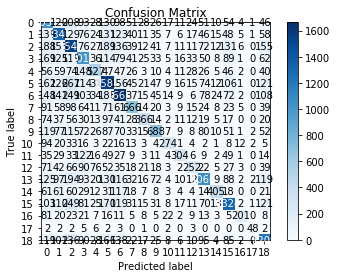

In [26]:
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

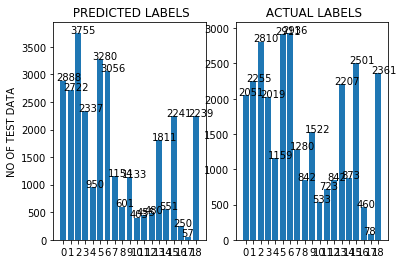

In [27]:
ax=plt.subplot(1,2,1)
x=np.arange(19)
height=[]
for i in range(0,19):
    height.append(len(y_pred[y_pred==i]))
plt.bar(x, height=height)
plt.xticks(x, x)
plt.title(" PREDICTED LABELS")
plt.ylabel("NO OF TEST DATA")
for index, value in enumerate(x):
    
    plt.text(value-1,len(y_pred[y_pred==value]), str(len(y_pred[y_pred==value])))
height=[]
for i in range(0,19):
    height.append(len(y_test[y_test==i]))
plt.subplot(1,2,2)
plt.bar(x, height=height)
plt.xticks(x, x)
plt.title(" ACTUAL LABELS")
for index, value in enumerate(x):
    plt.text(value-1,len(y_test[y_test==value]) , str(len(y_test[y_test==value])))


#### SVM

In [ ]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
y_pred=clf.predict(X_test)

#### SVM Report

In [ ]:
#Computation of the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy = ','%.2f'%(accuracy*100))

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, output_dict=True)
report1 = classification_report(y_test, y_pred)

macro_precision3 =  report['macro avg']['precision'] 
macro_recall3 = report['macro avg']['recall']    
macro_f13 = report['macro avg']['f1-score']
accuracy3 = report['accuracy']

print(report1)

In [ ]:
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

In [ ]:
ax=plt.subplot(1,2,1)
x=np.arange(19)
height=[]
for i in range(0,19):
    height.append(len(y_pred[y_pred==i]))
print(height)
plt.bar(x, height=height)
plt.xticks(x, x)
plt.title(" PREDICTED LABELS")
plt.ylabel("NO OF TEST DATA")
for index, value in enumerate(x):
    
    plt.text(value-1,len(y_pred[y_pred==value]), str(len(y_pred[y_pred==value])))
height=[]
for i in range(0,19):
    height.append(len(y_test[y_test==i]))
plt.subplot(1,2,2)
plt.bar(x, height=height)
plt.xticks(x, x)
plt.title(" ACTUAL LABELS")
for index, value in enumerate(x):
    plt.text(value-1,len(y_test[y_test==value]) , str(len(y_test[y_test==value])))


#### Comparision

In [ ]:
a=np.arange(3)
w=0.15
fig,ax=plt.subplots(figsize=(12,7),edgecolor='k')
p1=ax.bar(a,[accuracy1,accuracy2,accuracy3],w,color='b')
p2=ax.bar(a-w,[macro_precision1,macro_precision2,macro_precision3],w,color='g')
p3=ax.bar(a-2*w,[macro_recall1,macro_recall2,macro_recall3],w,color='y')
p4=ax.bar(a+w,[macro_f11,macro_f12,macro_f13],w,color='r')
ax.set_xticks(a)
ax.set_xticklabels(('Decision tree','Random Forest Classifier','SVM'))
ax.set_title('comparision between classifiers')
ax.legend((p1[0],p2[0],p3[0],p4[0]),('Accuracy','Precision','Recall','F1-Score'))
plt.xlabel('Classifiers')
#plt.grid()
plt.figure(figsize=(10,10))
plt.show()

In [36]:
set(Y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18}

In [ ]:
!pip install scikitplot

In [ ]:
#https://towardsdatascience.com/build-and-compare-3-models-nlp-sentiment-prediction-67320979de61
#https://towardsdatascience.com/bring-your-jupyter-notebook-to-life-with-interactive-widgets-bc12e03f0916